#Indian Statup Funding Analysis - Exploratary Data Analysis

##Loading and First Look

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


##Load the dataset

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

##Basic Dataset information

In [76]:
df.shape

(102, 8)

In [77]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [78]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


##Data quality Assessment

###check data types and missing values

In [79]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [80]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


##Check for duplicates

In [81]:
df.duplicated().sum()

np.int64(0)

##Basic statistics

In [82]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


##Data Preprossing

###Clean column names

In [83]:
df.columns = df.columns.str.strip()

##Convert Entry column to datetime

###Convert Entry column to datetime

In [84]:
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [85]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


##Create valuation growth metric

In [86]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


##Ectract primary city(before)

In [87]:
df['Primary_city'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_city
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


##Count number of investors

In [88]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_city,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


##Univariate Analysis

###Viluation Distribution Analysis

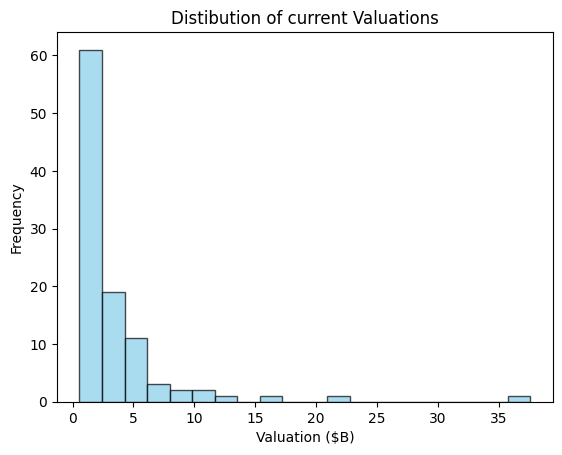

In [89]:
plt.hist(df['Valuation ($B)'], bins=20,alpha=0.7,color='skyblue', edgecolor='black')
plt.title('Distibution of current Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

###Sector distribution

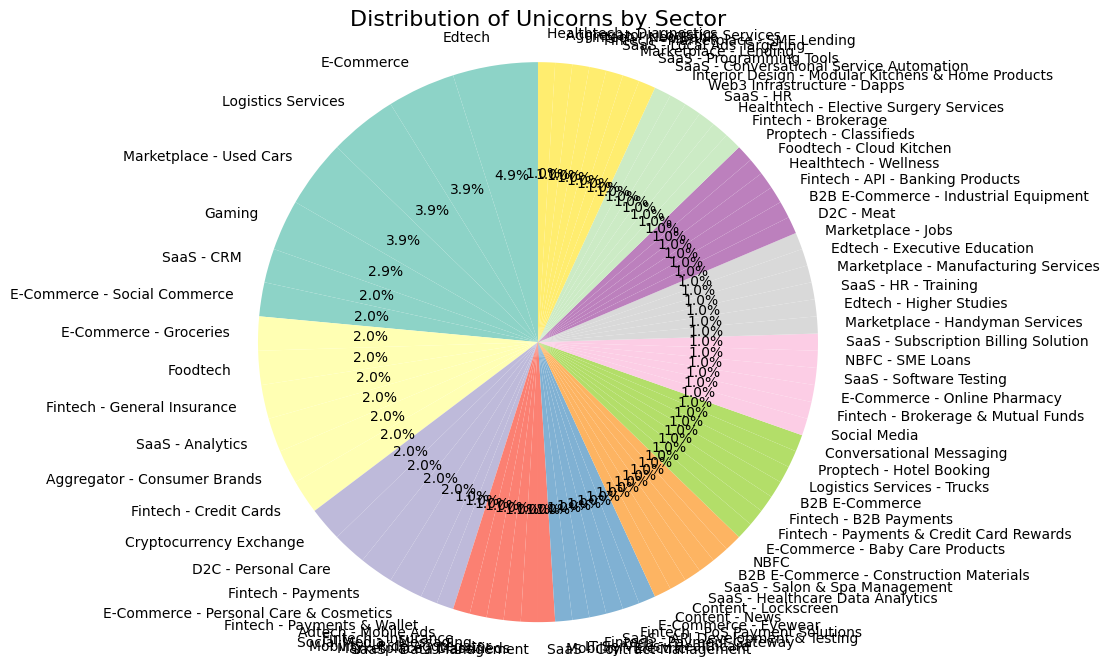

In [90]:
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution of Unicorns by Sector',fontsize=16,fontweight='20')
plt.axis('equal')
plt.show()

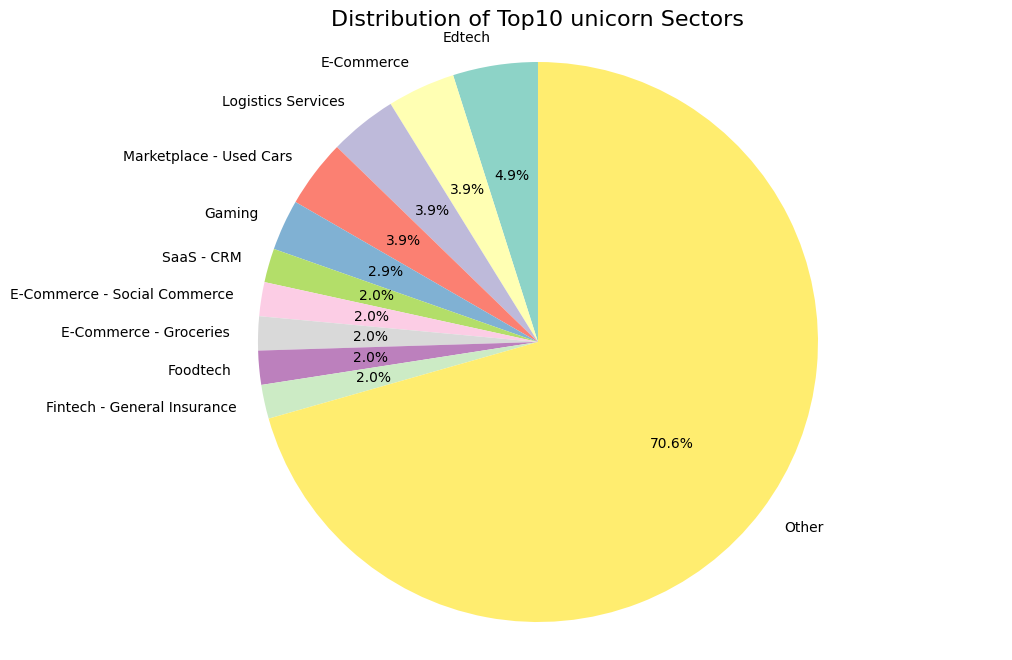

In [91]:
def display_top_k_sectors(df,k):
    sector_counts = df['Sector'].value_counts()

    if k < len(sector_counts):
        top_sector = sector_counts.head(k)
        other_sector_count = sector_counts.iloc[k:].sum()
        top_sector['Other'] = other_sector_count

    else:
        top_sector = sector_counts
    plt.figure(figsize=(12,8))
    colors = plt.cm.Set3(np.linspace(0,1,len(top_sector)))
    plt.pie(top_sector.values,labels=top_sector.index,autopct='%1.1f%%',colors=colors,startangle=90)
    plt.title(f'Distribution of Top{k} unicorn Sectors',fontsize=16,fontweight='20')
    plt.axis('equal')
    plt.show()
display_top_k_sectors(df,10)

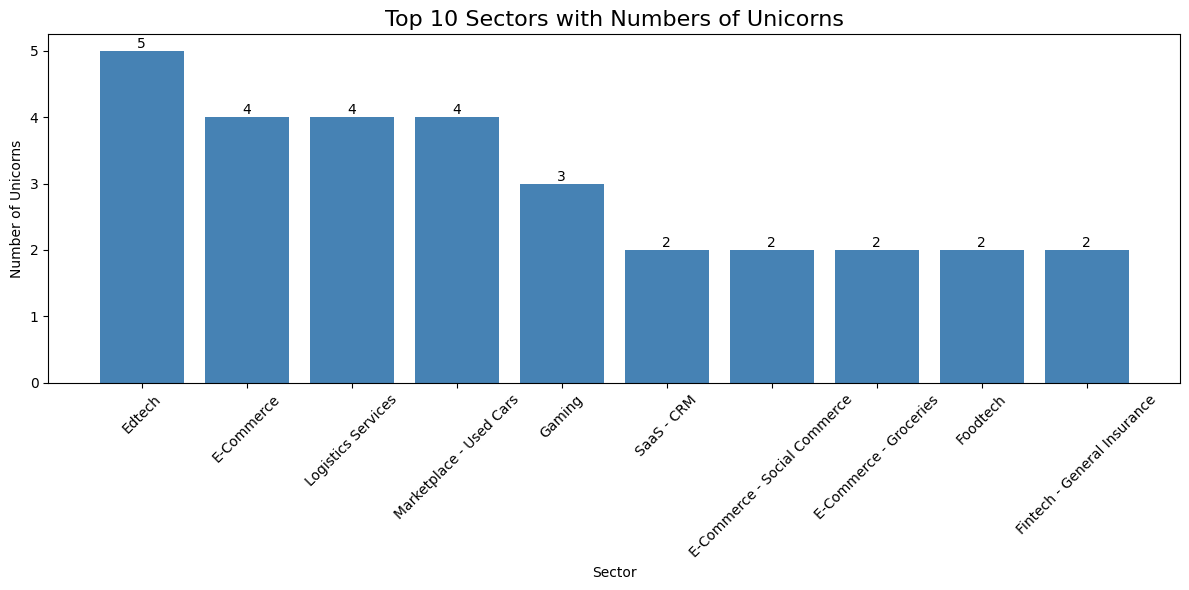

In [92]:
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color='steelblue')
plt.title('Top 10 Sectors with Numbers of Unicorns',fontsize=16,fontweight='20')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,)
for bar,value in zip(bars,top_sectors.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

###key insights
- EdTech leads with highest number of unicoms
- E-commerce and SaaS are majou contributors
- Edtech emergence as Significant sector
- Diversification across multiple sectors

##Geographic Distribution

###City wise distribution

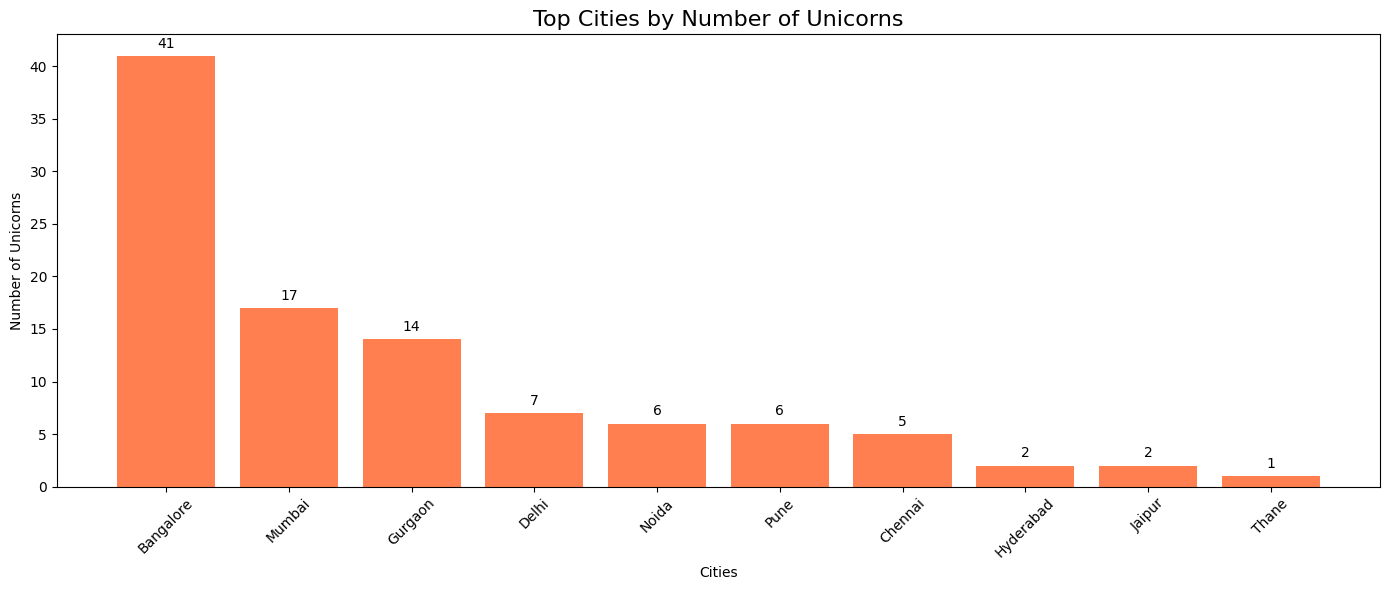

In [93]:
plt.figure(figsize=(14,6))
city_count = df['Primary_city'].value_counts().head(10)
bars = plt.bar(city_count.index,city_count.values,color='coral')
plt.title('Top Cities by Number of Unicorns',fontsize=16,fontweight='20')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
for bar,value in zip(bars,city_count.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height() + 0.5,str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

In [94]:
city_summary = df.groupby('Primary_city').agg({
    'Valuation ($B)' : ['count','sum','mean'],
    'Entry_Year' : ['min','max']
}).round(2)
city_summary.columns = ['Count','Total_Valuation','Avg_Valuation','First_Entry','Last_Entry']
display(city_summary.head(10))

,Count,Total_Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_city,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


Key Insights


*   Bangalore dominates with highest number of Unicons
*   Mumbai and Gurgoan are other Major Hands
-Geographic concentration in  tech cities
-Bnagalore leads in both count and total valuation

##Temporal Analysis

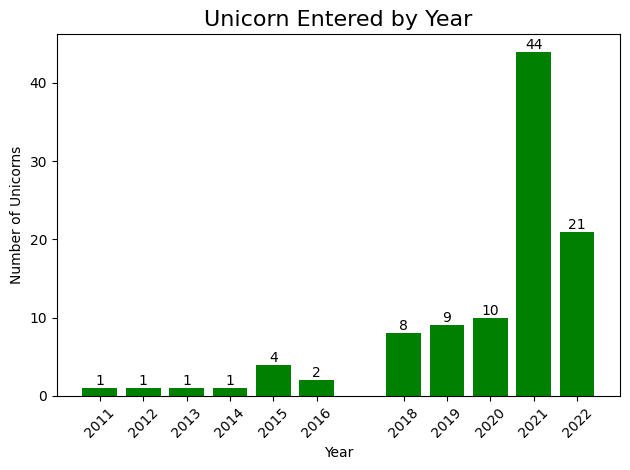

In [95]:
yearly_entries =df['Entry_Year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index,yearly_entries.values,color='green')
plt.title('Unicorn Entered by Year',fontsize=16,fontweight='20')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

for bar,value in zip(bars,yearly_entries.values):
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

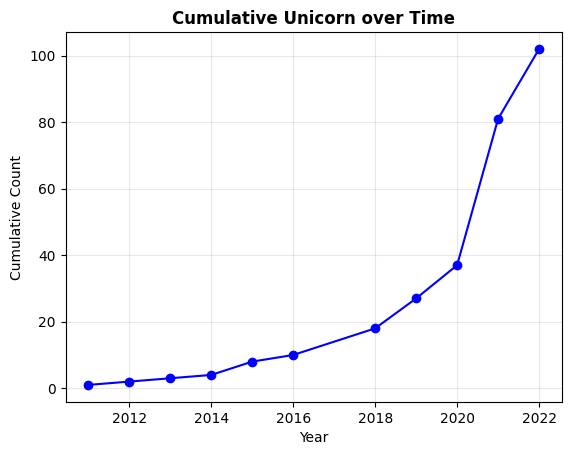

In [96]:
cummulative = yearly_entries.cumsum()
plt.plot(cummulative.index,cummulative.values,marker='o',linestyle='-',color='blue')
plt.title('Cumulative Unicorn over Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True,alpha=0.3)
plt.show()

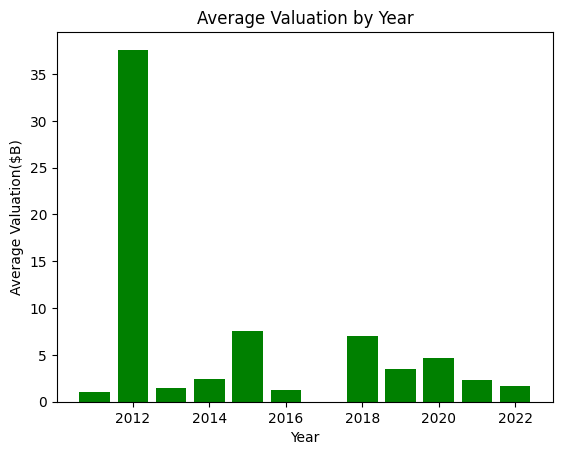

In [97]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='green')
plt.title('Average Valuation by Year')
plt.xlabel('Year')
plt.ylabel('Average Valuation($B)')
plt.show()

##Sector evolution time

<Figure size 1500x800 with 0 Axes>

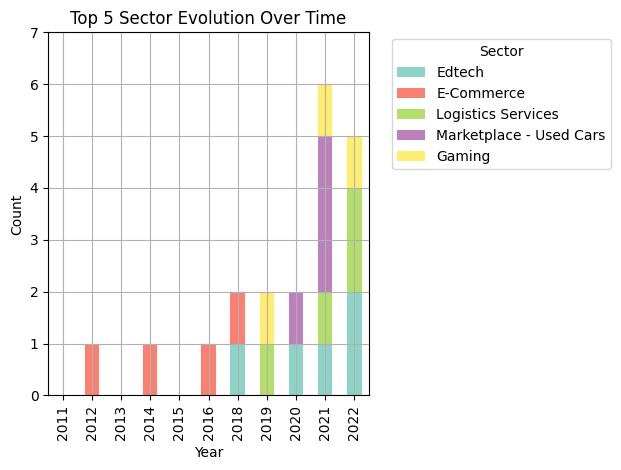

In [98]:
def display_k_sectors_evolution(df,k):
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)
  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()
  sector_year=sector_year[top_k_sectors_names]
  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',stacked=True,color=plt.cm.Set3(np.linspace(0,1,k)))
  plt.title(f'Top {k} Sector Evolution Over Time')
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True)
  plt.tight_layout()
  plt.show()

display_k_sectors_evolution(df,5)

##Bivariate Analysis

###Valuation vs Sector Analysis

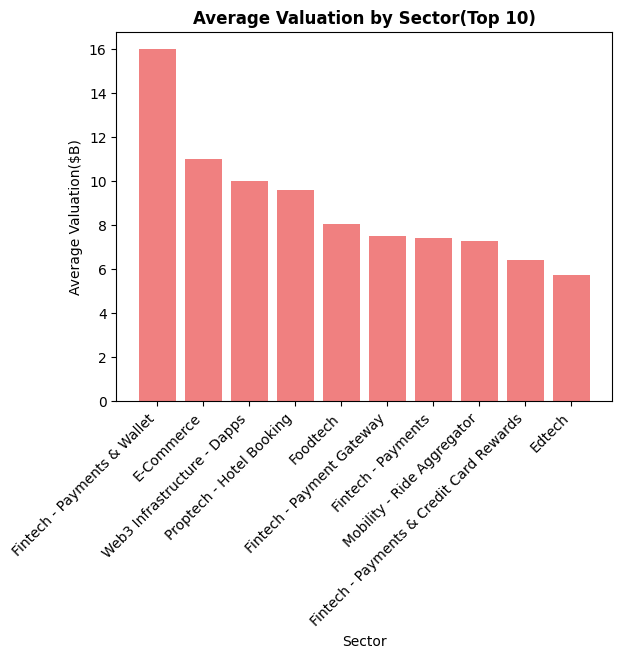

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')
df.columns = df.columns.str.strip()

avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)

bars = plt.bar(range(len(avg_valuation)),avg_valuation.values,color='lightcoral')
plt.title('Average Valuation by Sector(Top 10)',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=45,ha='right')
plt.show()

##Sector vs Count vs Total Valuation

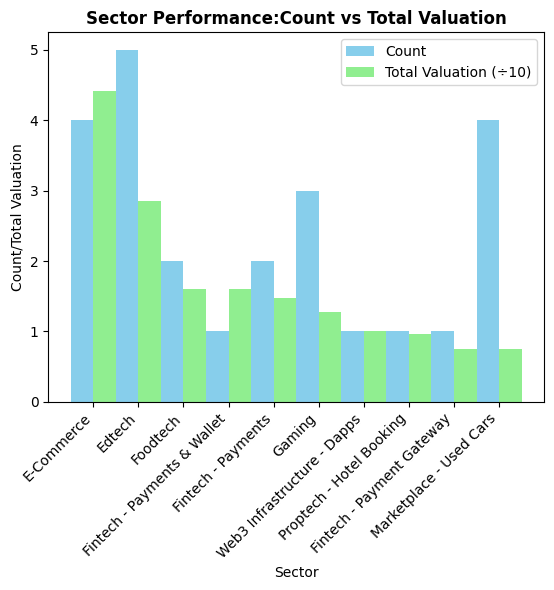

In [100]:
sector_summary = df.groupby('Sector').agg({
    'Valuation ($B)' : ['count','sum']

}).round(2)
sector_summary.columns =['Count','Total_Valuation']
sector_summary = sector_summary.sort_values('Total_Valuation',ascending=False).head(10)

x = np.arange(len(sector_summary))
width = 0.5

plt.bar(x - width/2,sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x + width/2,sector_summary['Total_Valuation']/10,width,label='Total Valuation (÷10)',color='lightgreen')

plt.title('Sector Performance:Count vs Total Valuation',fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count/Total Valuation')
plt.xticks(x,sector_summary.index,rotation=45,ha='right')
plt.legend()
plt.show()

KEY INSIGHTS


*   Ecommerce Shows Highest Average valuations
*   FIntech has most unicorns but moderate average valuation
-Web3 And Some Niche sectors show high growth multiples
-sector MAturity affects Valuation Patterns

##Geographic vs

###Average valuation by city

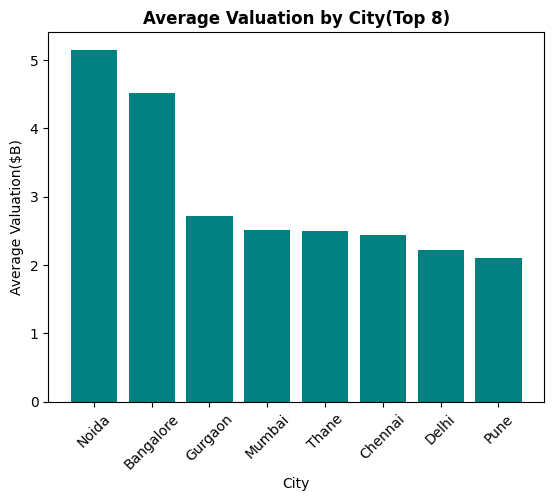

In [102]:
df['Primary_city'] = df['Location'].str.split('/').str[0]
city_valuation = df.groupby('Primary_city')['Valuation ($B)'].mean()
city_valuation = city_valuation.sort_values(ascending=False).head(8)

bars = plt.bar(city_valuation.index,city_valuation.values,color='teal')
plt.title('Average Valuation by City(Top 8)',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation($B)')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

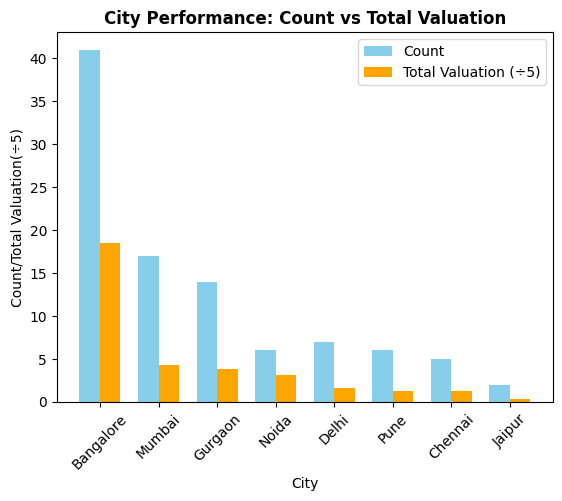

In [104]:
city_summary = df.groupby('Primary_city').agg({'Valuation ($B)': ['count', 'sum']}).round(2)
city_summary.columns = ['count', 'total_valuation']
city_summary = city_summary.sort_values('total_valuation', ascending=False).head(8)

x = np.arange(len(city_summary))
width = 0.35

plt.bar(x - width/2, city_summary['count'], width, label='Count', color='skyblue')
plt.bar(x + width/2, city_summary['total_valuation']/10, width, label='Total Valuation (÷5)', color='orange')
plt.title('City Performance: Count vs Total Valuation', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count/Total Valuation(÷5)')
plt.xticks(x, city_summary.index, rotation=45)
plt.legend()
plt.show




##Investor and Time-based Analysis

###Number of investors vs valuation

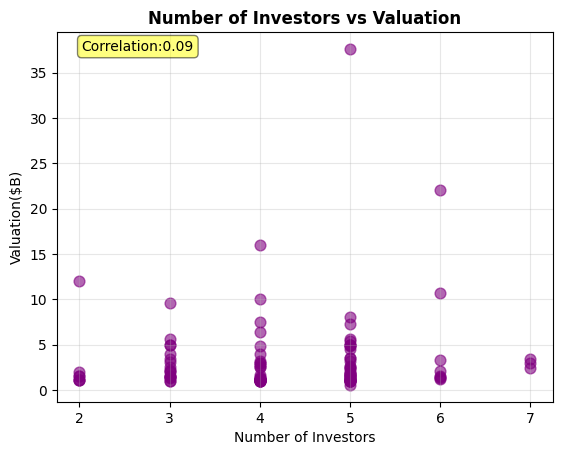

In [108]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
plt.scatter(df['Investor_Count'],df['Valuation ($B)'],alpha=0.6,s=60,color='purple')
plt.title('Number of Investors vs Valuation',fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation($B)')
plt.grid(True,alpha=0.3)


correlation =df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05,0.95,f'Correlation:{correlation:.2f}',transform=plt.gca().transAxes,bbox=dict(boxstyle="round,pad=0.3",facecolor="yellow",alpha=0.5))
plt.show()

##Most active investors

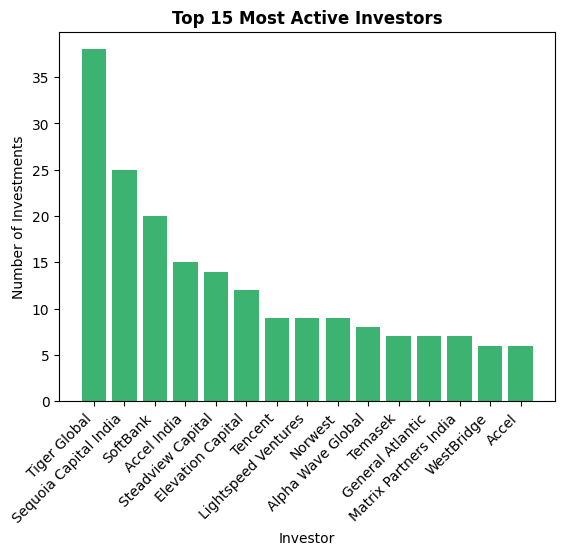

In [109]:
all_investor =[]
for Investors in df['Select Investors'].dropna():
    all_investor.extend(inv.strip() for inv in Investors.split(','))
investors_counts = pd.Series(all_investor).value_counts().head(15)
bars = plt.bar(range(len(investors_counts)),investors_counts.values,color='mediumseagreen')
plt.title('Top 15 Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investors_counts)),investors_counts.index,rotation=45,ha='right')
plt.show()

##Entry Year Investro county

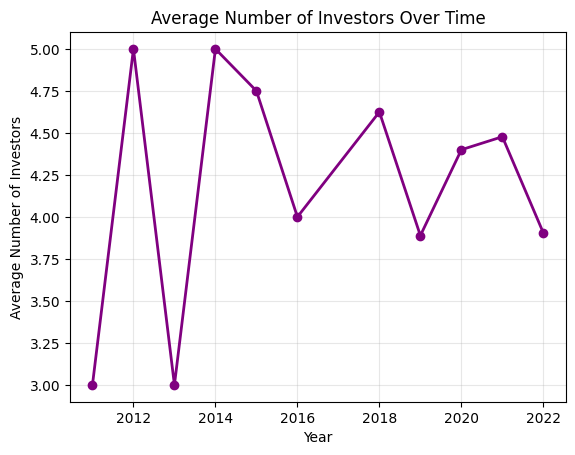

In [111]:
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',linewidth=2,markersize=6,color='purple')
plt.title('Average Number of Investors Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Investors')
plt.grid(True,alpha=0.3)
plt.show()

##Invesor count distribution

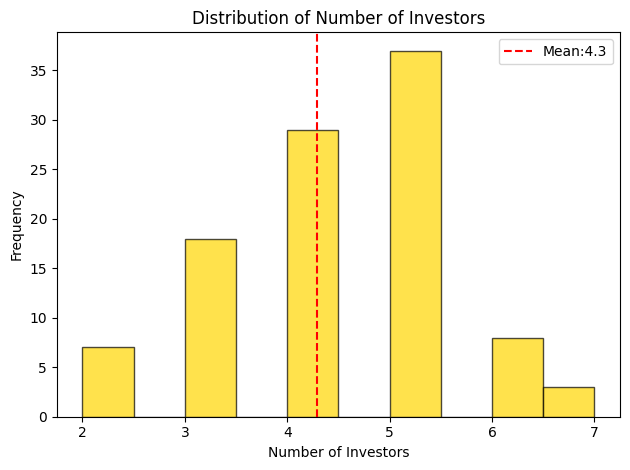

In [113]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
plt.hist(df['Investor_Count'],bins=10,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distribution of Number of Investors')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean:{df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

##Time Based Advanced Analysis